    install package

In [3]:
# !pip install tensorflow
# !pip install sklearn_extensions
# !pip uninstall scipy

package

In [4]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from scipy.linalg import pinv
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [5]:
#chuyển afff sang csv

data = arff.loadarff('../data/Training Dataset.arff')
data = pd.DataFrame(data[0])
#loại bỏ binary
data = data.apply(lambda col: col.map(lambda x: x.decode() if isinstance(x, bytes) else x))
data.to_csv('../data/data.csv', index=False)

In [6]:
data = pd.read_csv('../data/data.csv')
data.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [7]:
data.shape

(11055, 31)

In [8]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [53]:
null_columns = data.columns[data.isnull().any()]
len(null_columns)

0

In [10]:
# Đếm số dòng trùng nhau
duplicated = data.duplicated()
print(f"Có {duplicated.sum()} dòng trùng")
# Loại bỏ các dòng trùng nhau:
data.drop_duplicates(inplace=True)
print(f"Có {data.duplicated().sum()} dòng trùng sau khi lọc")

# Các dòng cùng dữ liệu nhưng khác nhau nhãn
noise_data = data.drop('Result', axis=1).duplicated()
print(f"Có {noise_data.sum()} dòng cùng dữ liệu nhưng khác nhãn")

data.drop_duplicates(subset=data.drop('Result', axis=1), inplace=True, keep=False)
data.shape

Có 5206 dòng trùng
Có 0 dòng trùng sau khi lọc
Có 64 dòng cùng dữ liệu nhưng khác nhãn


(5721, 31)

In [11]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.0000,5721.000000,5721.000000,5721.000000,...,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000
mean,0.124629,-0.610208,0.715434,0.580843,0.713337,-0.754938,0.0638,0.148226,-0.306415,0.572452,...,0.554274,0.780808,0.019053,0.471071,0.228631,-0.417934,0.655655,0.348540,0.690963,-0.033036
std,0.992290,0.781647,0.698741,0.814087,0.700883,0.655854,0.8025,0.923120,0.951981,0.820010,...,0.832407,0.624826,0.999906,0.882172,0.829414,0.908557,0.755127,0.581325,0.722953,0.999542
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.0000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.0000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.0000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


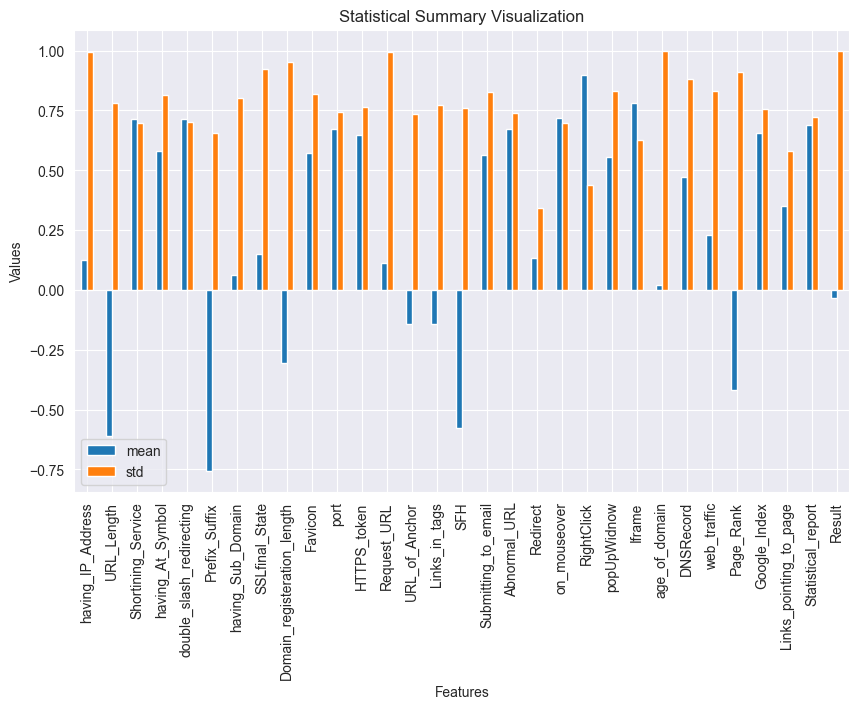

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

summary = data.describe().loc[['mean', 'std']]

summary.T.plot(kind='bar', figsize=(10, 6))

# Thêm tiêu đề và nhãn trục
plt.title('Statistical Summary Visualization')
plt.xlabel('Features')
plt.ylabel('Values')

# Hiển thị biểu đồ
plt.show()

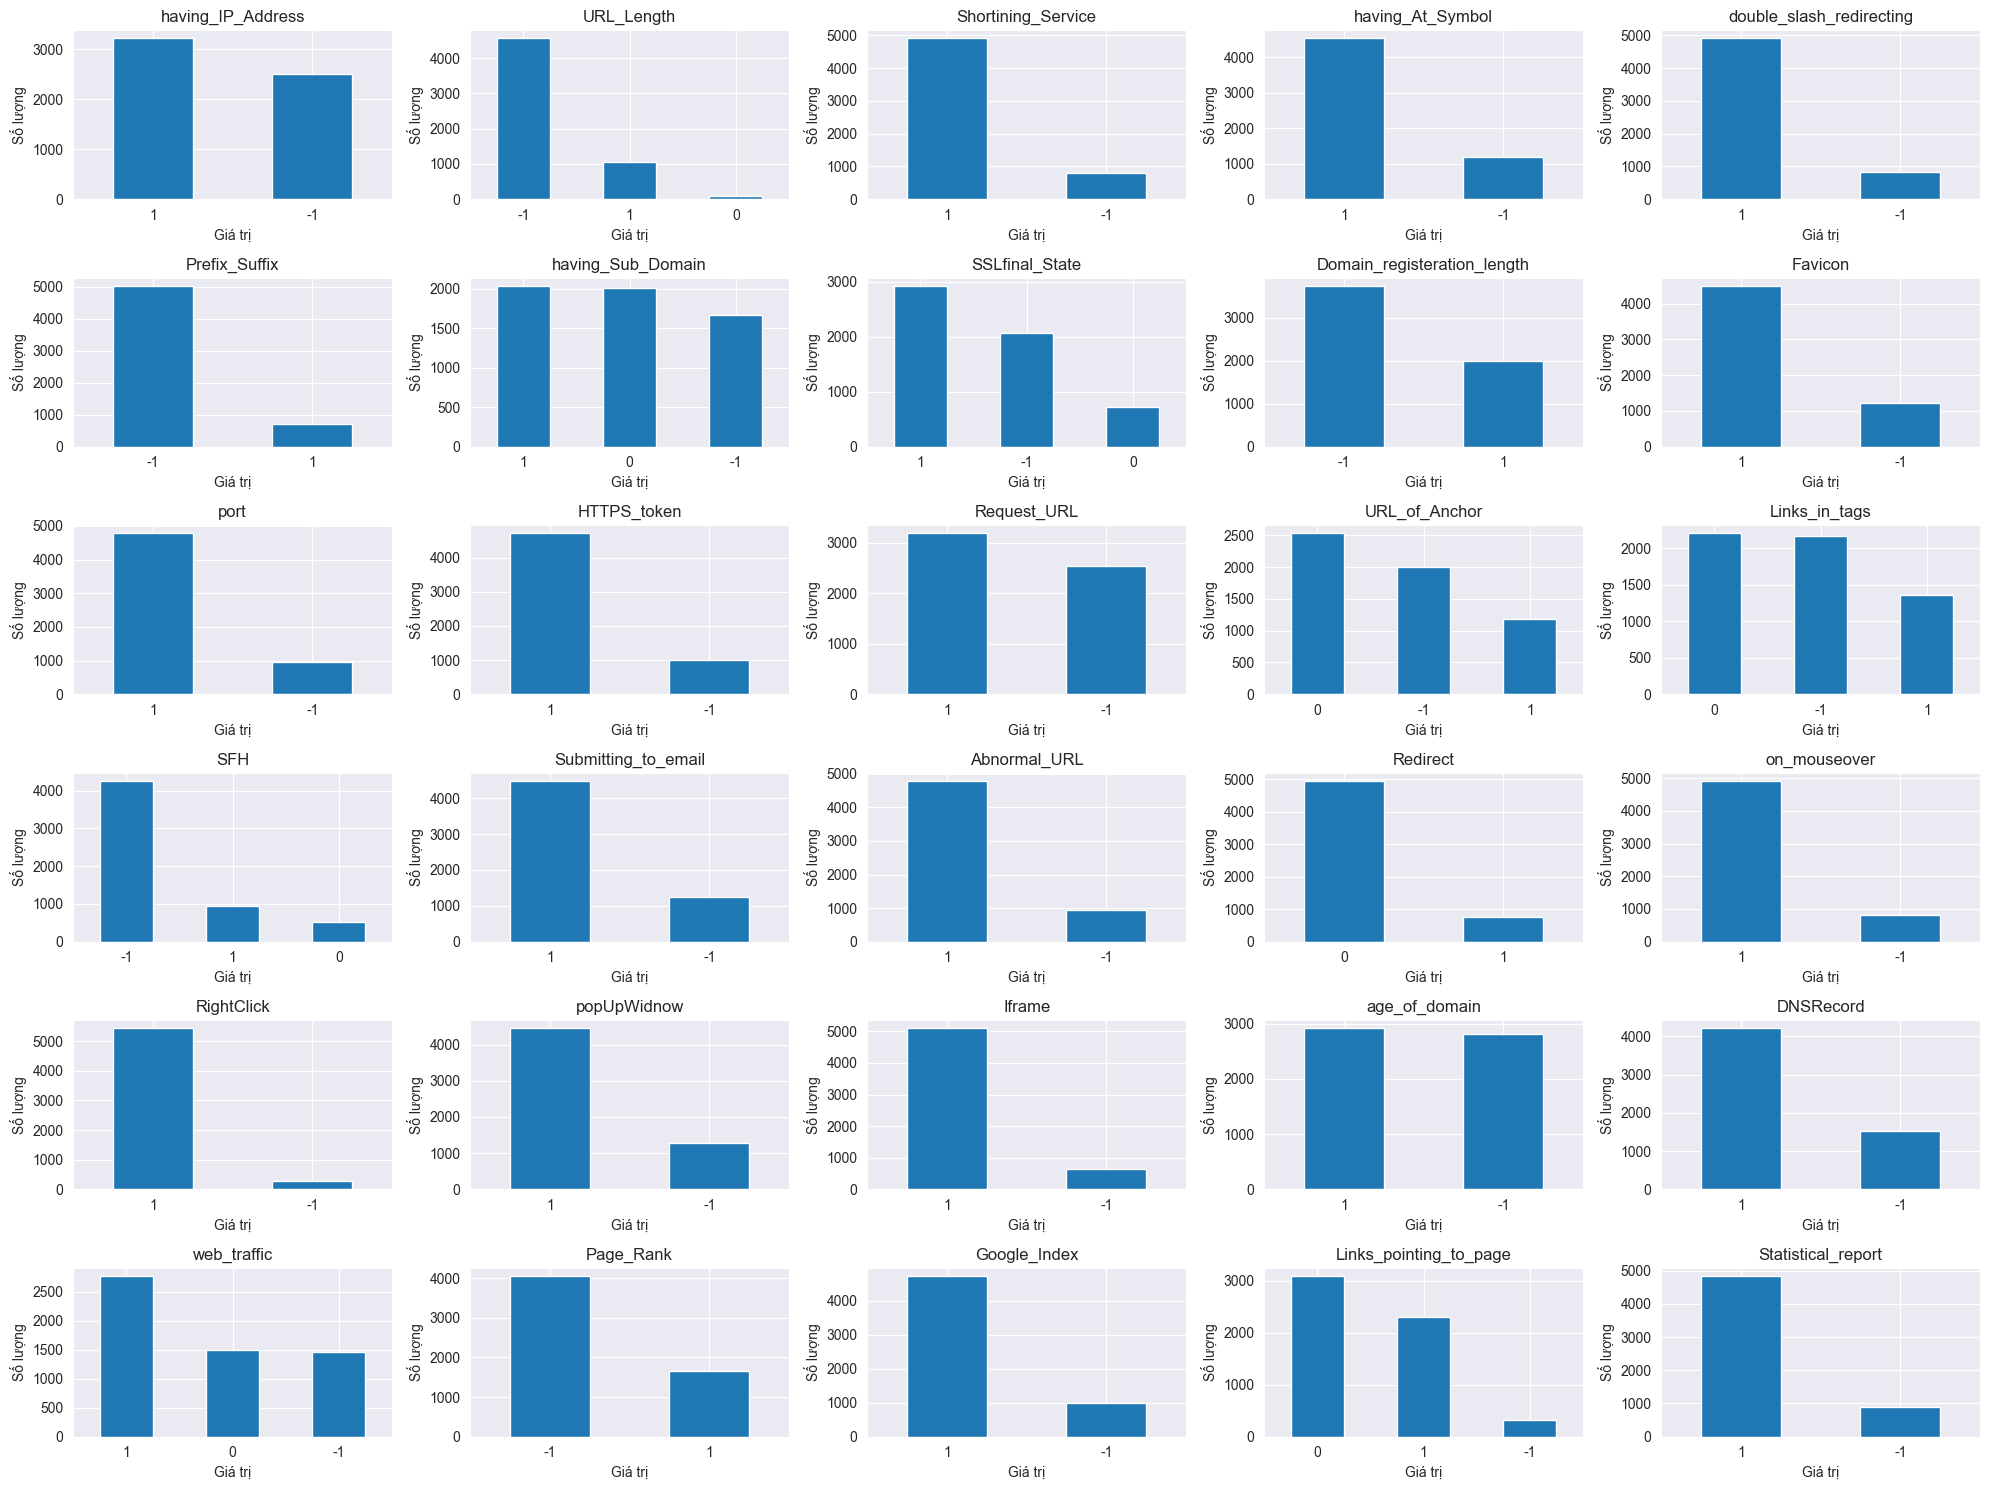

In [13]:
attributes = data.drop('Result', axis=1).columns
plt.figure(figsize=(20, 15))
for i, attr in enumerate(attributes):
    plt.subplot(6, 5, i + 1)
    data[attr].value_counts().plot(kind='bar')
    plt.title(attr)
    plt.xlabel('Giá trị')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

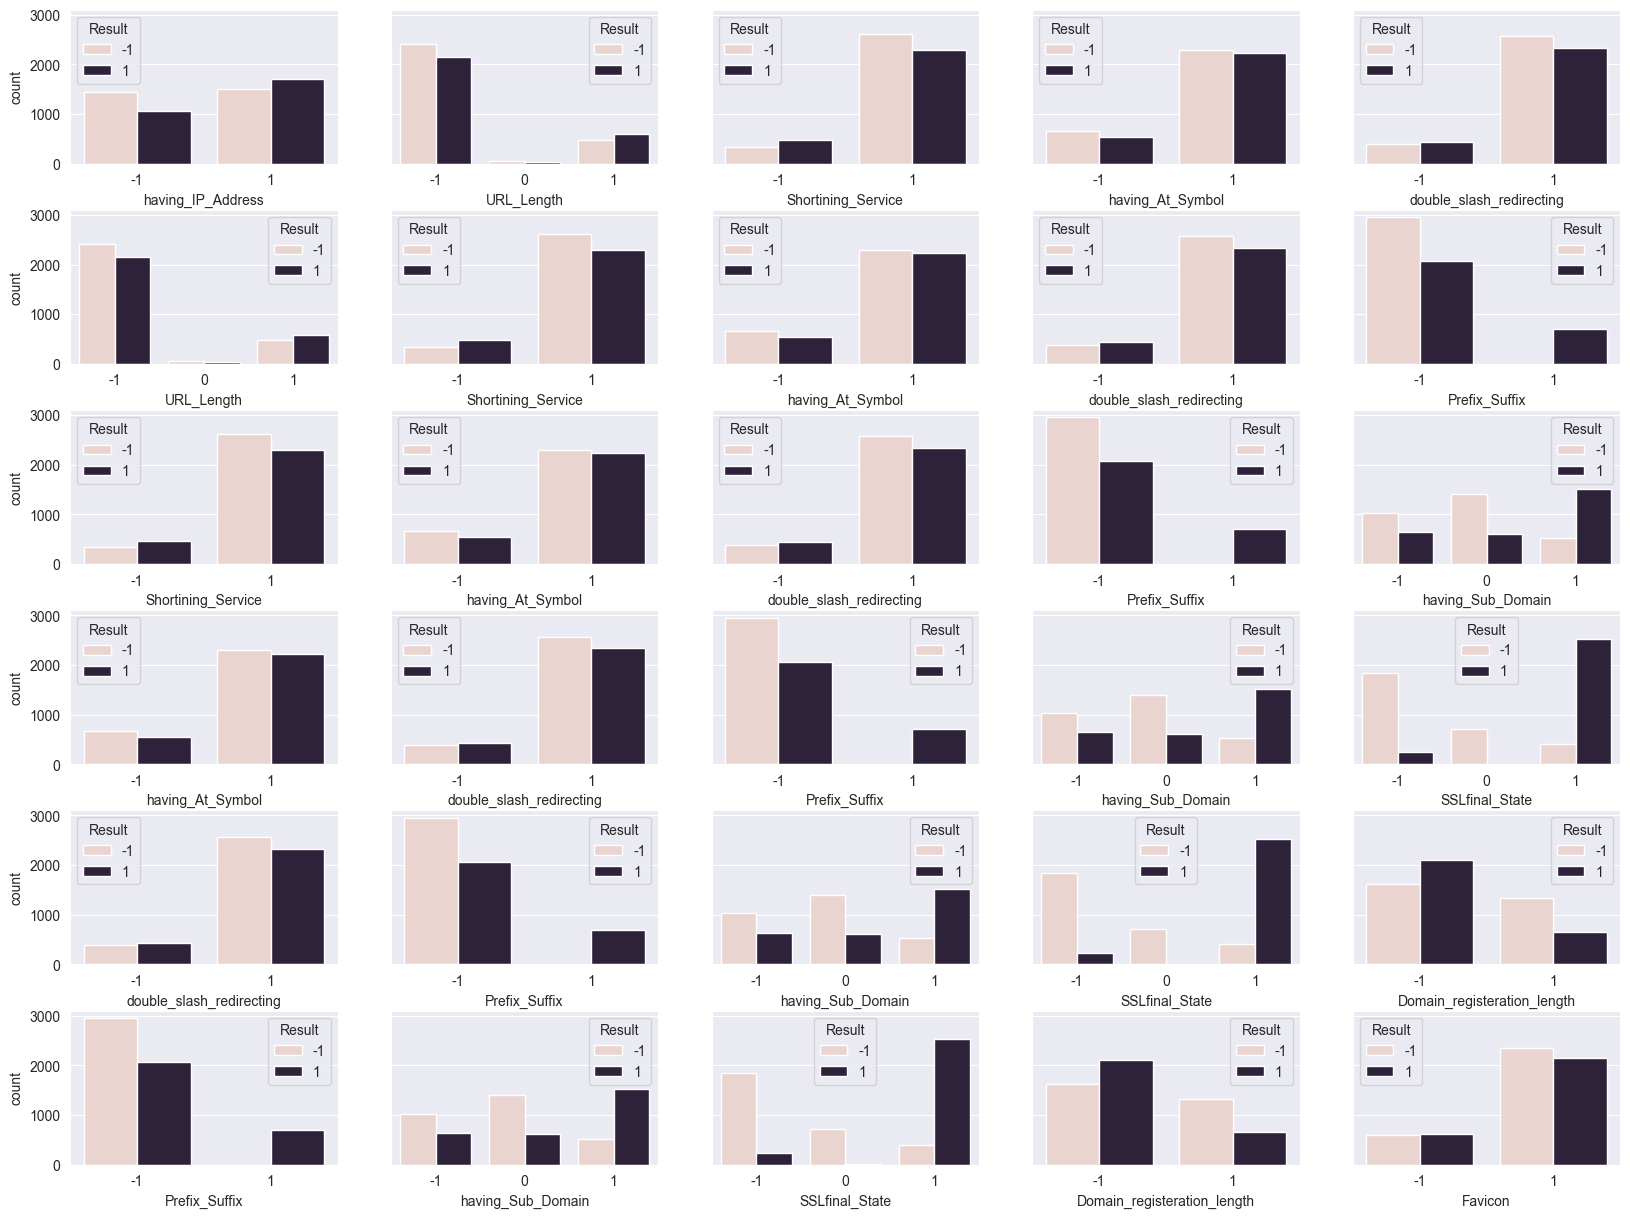

In [14]:
fig,ax=plt.subplots(6, 5,sharey=True,figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
for i in range(6):
    for j in range(5):
        sns.countplot(data=data,x=data.columns.values[i+j],hue='Result',ax=ax[i, j])
plt.show()

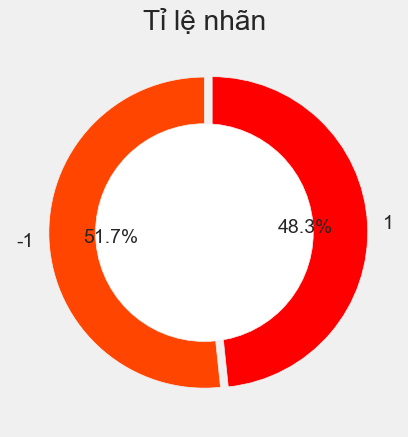

In [15]:
with plt.style.context(style="fivethirtyeight"):  
    plt.pie(x=dict(data['Result'].value_counts()).values(),  
           labels=dict(data['Result'].value_counts()).keys(),  
           autopct="%.1f%%", colors=['orangered','red'], startangle=90, explode=[0,0.05]) 
    centre_circle=plt.Circle((0,0),0.70,fc='white')  
    fig=plt.gcf()  
    fig.gca().add_artist(centre_circle)  
    plt.title(label="Tỉ lệ nhãn")  
    plt.show()

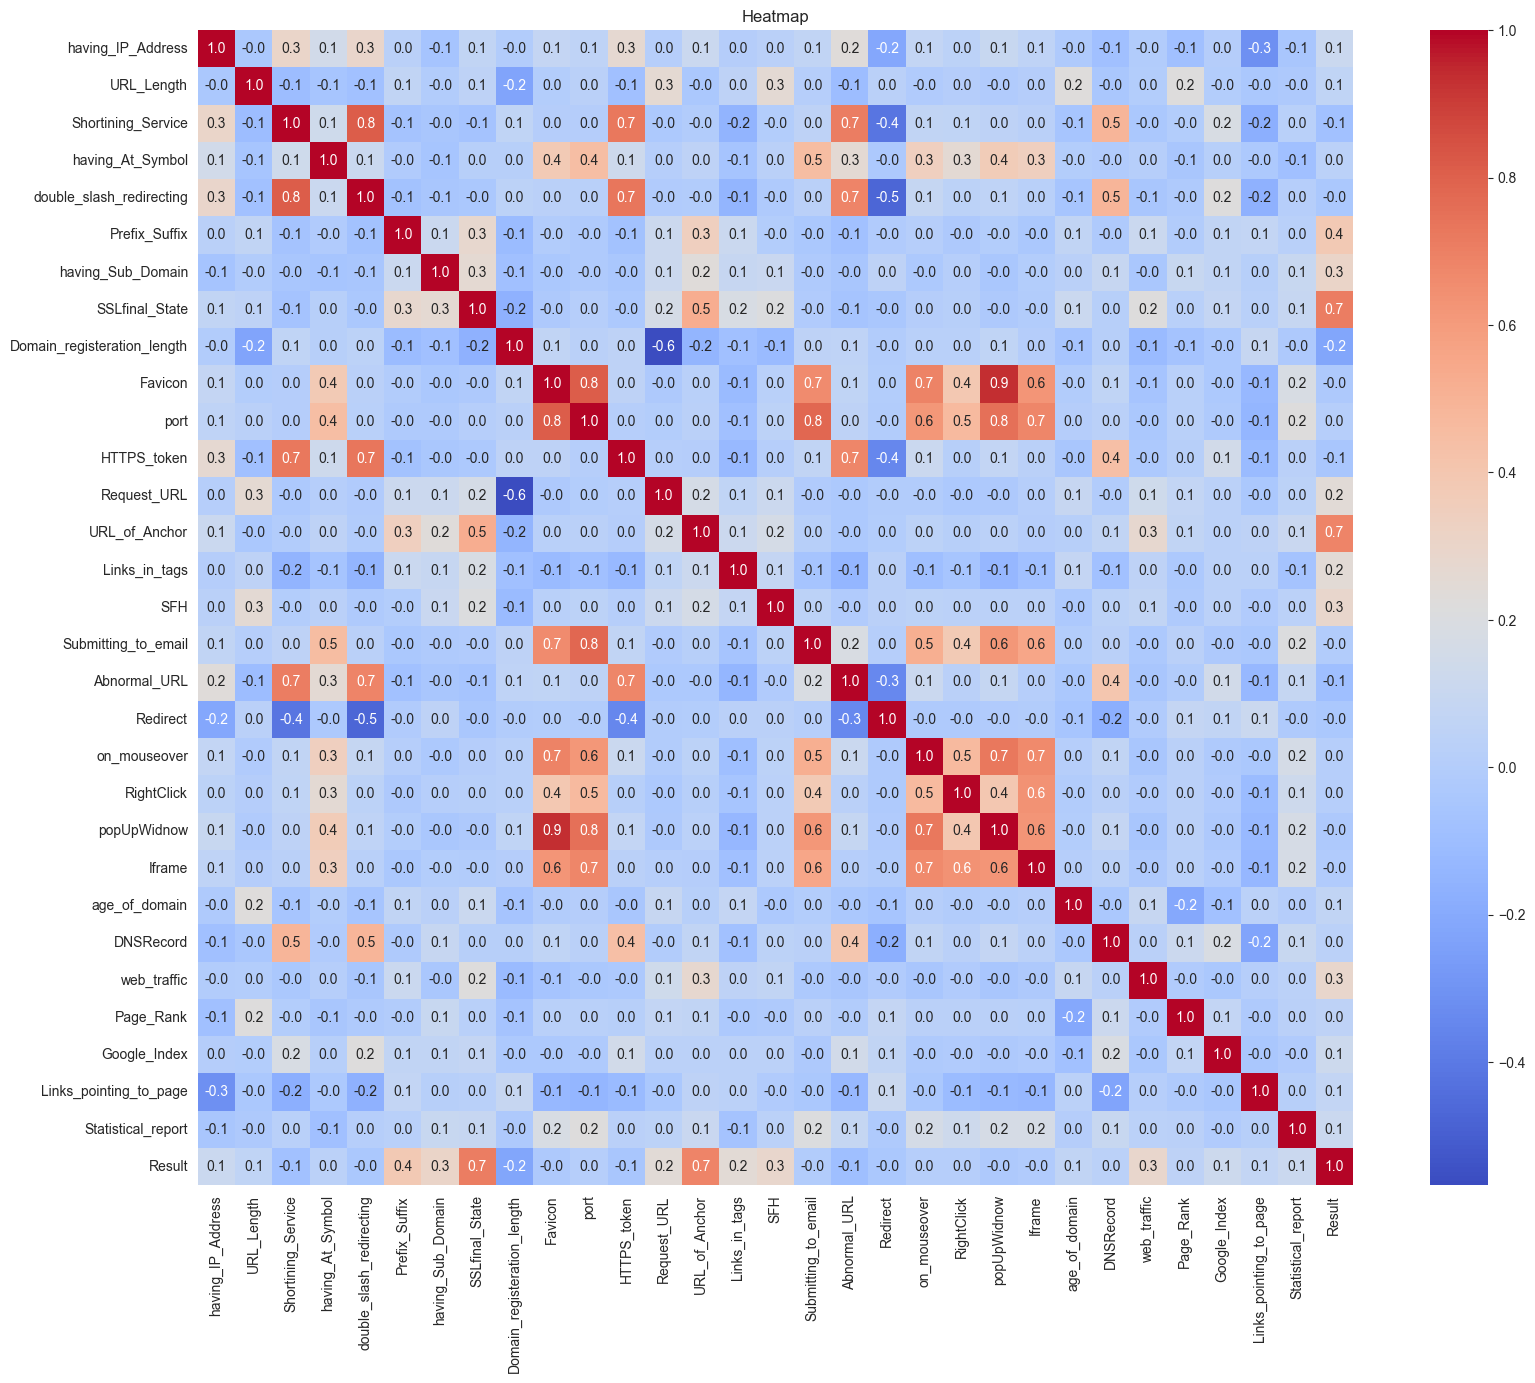

In [16]:
# heat map
plt.figure(figsize=(20, 15))  # Kích thước ảnh
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap='coolwarm', square=True)
plt.title('Heatmap')
plt.show()

In [17]:
#Xếp lại data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,1,1,1,1,-1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,0,-1,1
1,-1,1,-1,1,-1,-1,0,0,-1,1,...,1,1,1,-1,1,-1,-1,-1,1,-1
2,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,1,1,-1,-1,0,1,-1
3,-1,1,1,1,1,-1,0,-1,1,1,...,1,1,1,1,0,1,1,1,1,-1
4,1,-1,1,1,-1,-1,1,1,-1,1,...,1,1,-1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5716,1,-1,1,1,1,-1,0,0,1,1,...,1,1,-1,1,1,1,1,1,1,-1
5717,-1,1,1,1,1,-1,0,-1,1,1,...,1,1,-1,1,0,1,1,1,1,-1
5718,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,-1,1,1,1
5719,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,-1,1,1,-1,-1,0,1,-1


In [18]:
#x -> thuộc tính, y -> kết quả
y = data['Result'].values
x = data.drop('Result', axis=1).values
x.shape, y.shape

((5721, 30), (5721,))

In [19]:
#Chia tập training, test
y = data['Result'].values
x = data.drop('Result', axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.size, y_test.size

((4576, 30), (1145, 30), 4576, 1145)

In [20]:
models = []
train_accuracies = []
test_accuracies = []
f1_scores = []
precision_scores = []
def save_models_trains_tests(model, train_accuracy, test_accuracy, f1_score, precision_score):
    models.append(model)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    f1_scores.append(f1_score)
    precision_scores.append(precision_score)

Training

In [21]:
#Máy vector hỗ trợ(Support Vector Machines)
svm = SVC(random_state=42)
svm.fit(x_train, y_train)
y_svm_pred_train = svm.predict(x_train)
y_svm_pred_test = svm.predict(x_test)
svm_accuracy_train = accuracy_score(y_train, y_svm_pred_train)
svm_accuracy_test = accuracy_score(y_test, y_svm_pred_test)
svm_f1_score = f1_score(y_test, y_svm_pred_test)
svm_precision_score = precision_score(y_test, y_svm_pred_test)
print("SVM: Độ chính xác trên dữ liệu đào tạo: {:.3f}".format(svm_accuracy_train))
print("SVM: Độ chính xác trên dữ liệu thử: {:.3f}".format(svm_accuracy_test))
print("SVM: F1-score trên dữ liệu đào tạo {:.3f}".format(f1_score(y_train, y_svm_pred_train)))
print("SVM: F1-score trên dữ liệu thử {:.3f}".format(svm_f1_score))
print("SVM: Precision score trên dữ liệu thử {:.3f}".format(svm_precision_score))
save_models_trains_tests("SVM", svm_accuracy_train, svm_accuracy_test, svm_f1_score, svm_precision_score)
svm_cv = pd.Series(cross_val_score(svm, x_train, y_train, cv=5))

SVM: Độ chính xác trên dữ liệu đào tạo: 0.956
SVM: Độ chính xác trên dữ liệu thử: 0.947
SVM: F1-score trên dữ liệu đào tạo 0.955
SVM: F1-score trên dữ liệu thử 0.946
SVM: Precision score trên dữ liệu thử 0.941


In [22]:
#Cây quyết định (Decision Tree)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_tree_pred_train = tree.predict(x_train)
y_tree_pred_test = tree.predict(x_test)
accuracy_train = accuracy_score(y_train, y_tree_pred_train)
accuracy_test = accuracy_score(y_test, y_tree_pred_test)
tree_f1_score = f1_score(y_test, y_tree_pred_test)
tree_precision_score = precision_score(y_test, y_tree_pred_test)
print("Decision Tree: Độ chính xác trên dữ liệu đào tạo: {:.3f}".format(accuracy_train))
print("Decision Tree: Độ chính xác trên dữ liệu thử: {:.3f}".format(accuracy_test))
print("Decision Tree: F1-score trên dữ liệu đào tạo {:.3f}".format(f1_score(y_train, y_tree_pred_train)))
print("Decision Tree: F1-score trên dữ liệu thử {:.3f}".format(f1_score(y_test, y_tree_pred_test)))
print("Decision Tree: Precision score trên dữ liệu thử {:.3f}".format(tree_precision_score))
save_models_trains_tests("Decision Tree", accuracy_train, accuracy_test, tree_f1_score, tree_precision_score)
tree_cv = pd.Series(cross_val_score(tree, x_train, y_train, cv=5))
tree_cv

Decision Tree: Độ chính xác trên dữ liệu đào tạo: 1.000
Decision Tree: Độ chính xác trên dữ liệu thử: 0.943
Decision Tree: F1-score trên dữ liệu đào tạo 1.000
Decision Tree: F1-score trên dữ liệu thử 0.941
Decision Tree: Precision score trên dữ liệu thử 0.949


0    0.951965
1    0.942077
2    0.940984
3    0.940984
4    0.955191
dtype: float64

In [23]:
#RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_rf_pred_train = rf.predict(x_train)
y_rf_pred_test = rf.predict(x_test)
rf_accuracy_train = accuracy_score(y_train, y_rf_pred_train)
rf_accuracy_test = accuracy_score(y_test, y_rf_pred_test)
rf_f1_score = f1_score(y_test, y_rf_pred_test)
rf_precision_score = precision_score(y_test, y_rf_pred_test)
print("RandomForest: Độ chính xác trên dữ liệu đào tạo: {:.3f}".format(rf_accuracy_train))
print("RandomForest: Độ chính xác trên dữ liệu thử: {:.3f}".format(rf_accuracy_test))
print("RandomForest: F1-score trên dữ liệu đào tạo {:.3f}".format(f1_score(y_train, y_rf_pred_train)))
print("RandomForest: F1-score trên dữ liệu thử {:.3f}".format(f1_score(y_test, y_rf_pred_test)))
print("RandomForest: Precision score trên dữ liệu thử {:.3f}".format(rf_precision_score))
save_models_trains_tests("RandomForest", rf_accuracy_train, rf_accuracy_test, rf_f1_score, rf_precision_score)
rf_cv = pd.Series(cross_val_score(rf, X=x_test, y=y_test, cv=5))
rf_cv

RandomForest: Độ chính xác trên dữ liệu đào tạo: 1.000
RandomForest: Độ chính xác trên dữ liệu thử: 0.962
RandomForest: F1-score trên dữ liệu đào tạo 1.000
RandomForest: F1-score trên dữ liệu thử 0.962
RandomForest: Precision score trên dữ liệu thử 0.959


0    0.930131
1    0.943231
2    0.925764
3    0.943231
4    0.960699
dtype: float64

In [24]:
#lưu model
pickle.dump(svm, open('../models/svm.pkl', 'wb'))
pickle.dump(rf, open('../models/rf.pkl', 'wb'))
pickle.dump(tree, open('../models/tree.pkl', 'wb'))

In [25]:
#So sánh các mô hình
results = pd.DataFrame(
    {
        'Model': models, 
        'Train Accuracy': train_accuracies, 
        'Test Accuracy': test_accuracies,
        'F1 Score': f1_scores, 
        'Precision Score': precision_scores,
    }
)
results.sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending=False, inplace=True)
results

,Model,Train Accuracy,Test Accuracy,F1 Score,Precision Score
2,RandomForest,1.000000,0.962445,0.961573,0.959002
1,Decision Tree,1.000000,0.943231,0.941283,0.948998
0,SVM,0.955638,0.946725,0.945584,0.941385


In [26]:
model_compare = pd.concat([svm_cv, tree_cv, rf_cv], axis=1)
model_compare["index"] = list(model_compare.index)
model_compare.columns=(["Svm", "Tree", "RandomForest", "index"])
model_compare

,Svm,Tree,RandomForest,index
0,0.954148,0.951965,0.930131,0
1,0.942077,0.942077,0.943231,1
2,0.939891,0.940984,0.925764,2
3,0.953005,0.940984,0.943231,3
4,0.946448,0.955191,0.960699,4


In [27]:
model_compare.describe()

,Svm,Tree,RandomForest,index
count,5.000000,5.000000,5.000000,5.000000
mean,0.947114,0.946240,0.940611,2.000000
std,0.006368,0.006810,0.013670,1.581139
min,0.939891,0.940984,0.925764,0.000000
25%,0.942077,0.940984,0.930131,1.000000
50%,0.946448,0.942077,0.943231,2.000000
75%,0.953005,0.951965,0.943231,3.000000
max,0.954148,0.955191,0.960699,4.000000


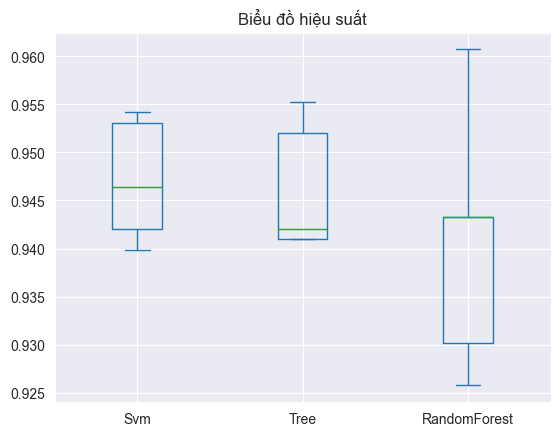

In [28]:
model_compare.drop("index", axis=1).plot.box()
plt.title("Biểu đồ hiệu suất")
plt.show()

Random Forest có điểm đánh giá cao nhất trong cả 2 tập train và test, lựa chọn mô hình này làm mô hình dự đoán cho input người dùng.

SVM có điểm đánh giá cao thứ 2 nhưng có độ ổn định là cao nhất.

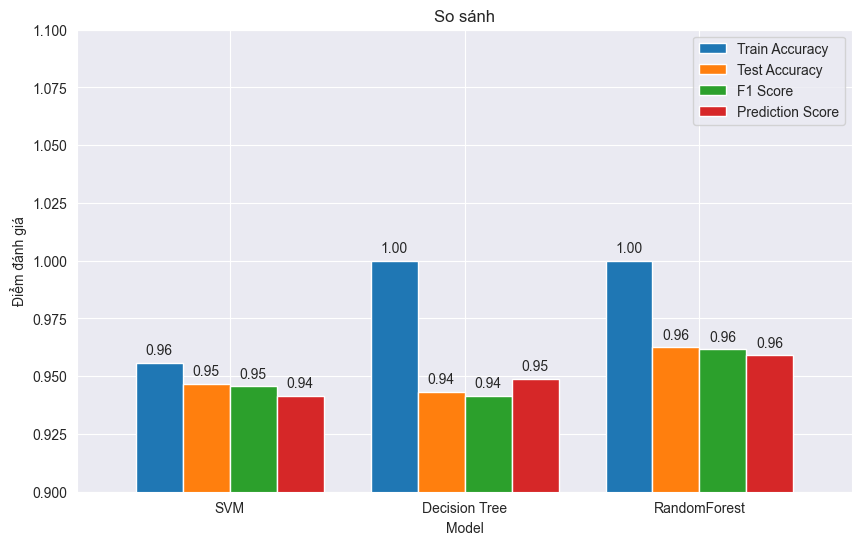

In [35]:
df_results = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'F1 Score': f1_scores,
    'Prediction Score': precision_scores
})
ax = df_results.set_index('Model').plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('So sánh')
plt.ylabel('Điểm đánh giá')
plt.xticks(rotation=0)
plt.ylim(0.9, 1.1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.legend(loc='upper right')
plt.show()

In [37]:
svm_optimize = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
}
grid = GridSearchCV(svm_optimize, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print("best params", grid.best_params_)
best_svm_model = grid.best_estimator_
predictions = best_svm_model.predict(x_test)
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best params {'C': 100, 'gamma': 0.01}
              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       587
           1       0.95      0.94      0.95       558

    accuracy                           0.95      1145
   macro avg       0.95      0.95      0.95      1145
weighted avg       0.95      0.95      0.95      1145



In [38]:
svm_best_cv = pd.Series(cross_val_score(best_svm_model, x_train, y_train, cv=5))
svm_best_cv

0    0.956332
1    0.950820
2    0.942077
3    0.961749
4    0.967213
dtype: float64

<Axes: >

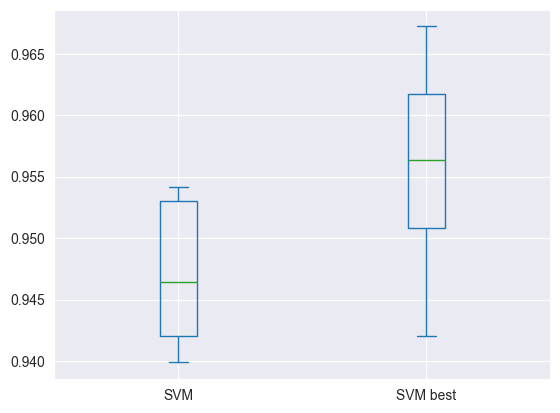

In [39]:
svm_compare = pd.concat([svm_cv, svm_best_cv], axis=1)
svm_compare.columns=["SVM", "SVM best"]
svm_compare.plot.box()

In [40]:
param_grid = { 
    'n_estimators': range(1, 30), 
    'max_depth': [3, 5, 7, None],
} 
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid,refit=True, verbose=2, cv=5, n_jobs=-1) 
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 116 candidates, totalling 580 fits
RandomForestClassifier(n_estimators=22)


In [41]:
best_rf_model = grid_search.best_estimator_
predictions = best_rf_model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.96       587
           1       0.97      0.96      0.96       558

    accuracy                           0.96      1145
   macro avg       0.96      0.96      0.96      1145
weighted avg       0.96      0.96      0.96      1145



In [42]:
rf_best_cv = pd.Series(cross_val_score(best_rf_model, x_train, y_train, cv=5))
rf_best_cv

0    0.960699
1    0.953005
2    0.961749
3    0.968306
4    0.969399
dtype: float64

<Axes: >

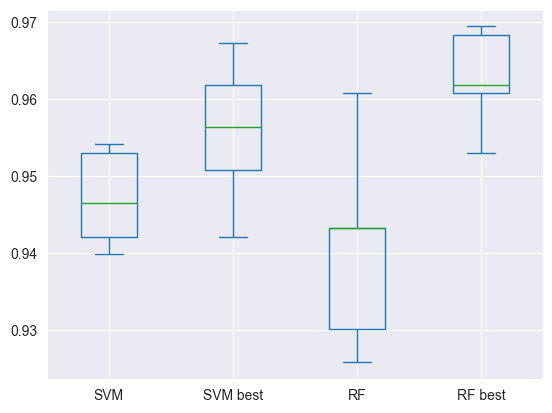

In [43]:
svm_compare = pd.concat([svm_cv, svm_best_cv, rf_cv, rf_best_cv], axis=1)
svm_compare.columns=["SVM", "SVM best", "RF", "RF best"]
svm_compare.plot.box()

In [44]:
svm_compare.describe()

,SVM,SVM best,RF,RF best
count,5.000000,5.000000,5.000000,5.000000
mean,0.947114,0.955638,0.940611,0.962632
std,0.006368,0.009733,0.013670,0.006618
min,0.939891,0.942077,0.925764,0.953005
25%,0.942077,0.950820,0.930131,0.960699
50%,0.946448,0.956332,0.943231,0.961749
75%,0.953005,0.961749,0.943231,0.968306
max,0.954148,0.967213,0.960699,0.969399


In [45]:
# lưu
pickle.dump(best_rf_model, open('../models/final_model.pkl', 'wb'))

In [46]:
# lấy ra
model = pickle.load(open('../models/final_model.pkl', 'rb'))

In [47]:
input = [1,-1,1,1,1,-1,0,-1,-1,1,1,-1,-1,1,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,0,1]

In [48]:
model.predict([input])[0]

1

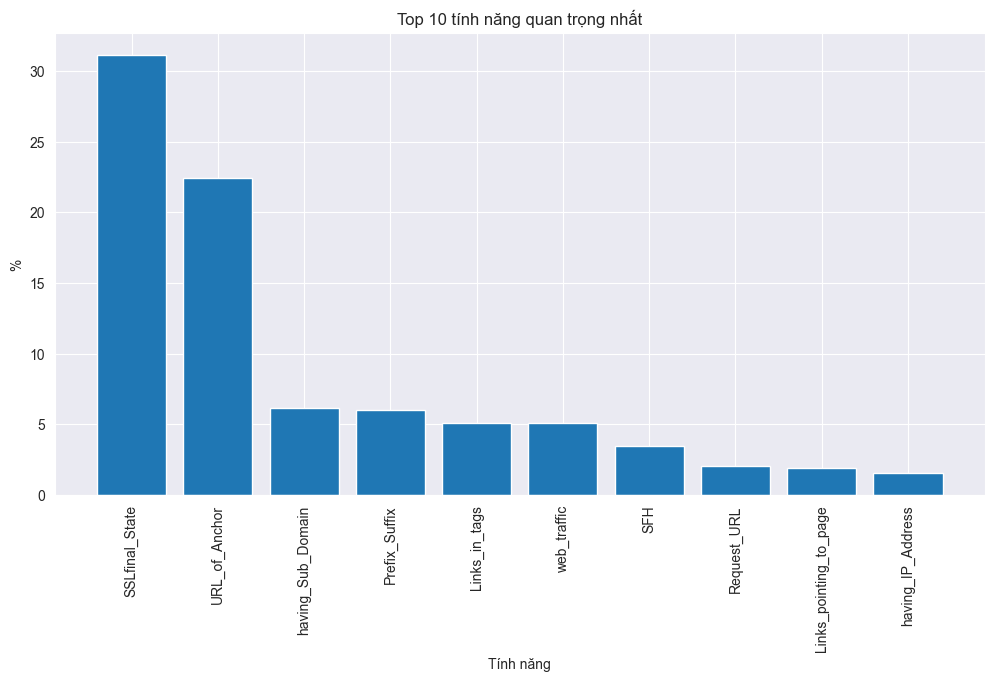

In [49]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(best_rf_model, prefit=True)
important_features = data.drop("Result", axis=1).columns[selector.get_support()]
feature_importances = best_rf_model.feature_importances_
importance_ratios = {feature: importance/sum(feature_importances) for feature, importance in zip(data.drop("Result", axis=1).columns, feature_importances)}
sorted_importances = sorted(importance_ratios.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_importances[:10])), [ratio*100 for _, ratio in sorted_importances[:10]], tick_label=[feature for feature, _ in sorted_importances[:10]])
plt.xlabel('Tính năng')
plt.ylabel('%')
plt.title('Top 10 tính năng quan trọng nhất')
plt.xticks(rotation=90)
plt.show()